In [1]:
%load_ext autoreload
%autoreload 2

# An inverse problem of the Navier-Stokes equation

Benchmark on the Inverse problem for the Navier-Stokes system as proposed in DeepXDE documentation: https://github.com/lululxvi/deepxde/blob/master/examples/pinn_inverse/Navier_Stokes_inverse.py.


In [2]:
seed = 1

In [3]:
import numpy as np
from scipy.io import loadmat

# from PINNACLE
DEFAULT_NUM_DOMAIN_POINTS = 700
DEFAULT_NUM_BOUNDARY_POINTS = 200
DEFAULT_NUM_INITIAL_POINTS = 100

# Load training data
def load_training_data(num):
    data = loadmat("cylinder_nektar_wake.mat")
    U_star = data["U_star"]  # N x 2 x T
    P_star = data["p_star"]  # N x T
    t_star = data["t"]  # T x 1
    X_star = data["X_star"]  # N x 2
    N = X_star.shape[0]
    T = t_star.shape[0]
    # Rearrange Data
    XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
    YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
    TT = np.tile(t_star, (1, N)).T  # N x T
    UU = U_star[:, 0, :]  # N x T
    VV = U_star[:, 1, :]  # N x T
    PP = P_star  # N x T
    x = XX.flatten()[:, None]  # NT x 1
    y = YY.flatten()[:, None]  # NT x 1
    t = TT.flatten()[:, None]  # NT x 1
    u = UU.flatten()[:, None]  # NT x 1
    v = VV.flatten()[:, None]  # NT x 1
    p = PP.flatten()[:, None]  # NT x 1
    # training domain: X × Y = [1, 8] × [−2, 2] and T = [0, 7]
    data1 = np.concatenate([x, y, t, u, v, p], 1)
    data2 = data1[:, :][data1[:, 2] <= 7]
    data3 = data2[:, :][data2[:, 0] >= 1]
    data4 = data3[:, :][data3[:, 0] <= 8]
    data5 = data4[:, :][data4[:, 1] >= -2]
    data_domain = data5[:, :][data5[:, 1] <= 2]
    # choose number of training points: num =7000
    idx = np.random.choice(data_domain.shape[0], num, replace=False)
    x_train = data_domain[idx, 0:1]
    y_train = data_domain[idx, 1:2]
    t_train = data_domain[idx, 2:3]
    u_train = data_domain[idx, 3:4]
    v_train = data_domain[idx, 4:5]
    p_train = data_domain[idx, 5:6]
    return [x_train, y_train, t_train, u_train, v_train, p_train]

C1_init = 0.0
C2_init = 0.0

**Summary:**
- [DeepXDE](#DeepXDE)
- [jinns](#jinns)
- [PINA](#PINA)
- [Comparisons](#Comparisons)

## DeepXDE


We use the tensorflow backend as JAX backend is not available

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.693517 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [6.78e-04, 2.93e-02, 8.56e-03, 7.08e-01, 2.84e-01]    [6.78e-04, 2.93e-02, 8.56e-03, 7.08e-01, 2.84e-01]    []  
1000      [6.65e-04, 9.36e-04, 1.12e-03, 2.98e-03, 3.60e-03]    [6.65e-04, 9.36e-04, 1.12e-03, 2.98e-03, 3.60e-03]    []  
2000      [3.18e-04, 4.84e-04, 3.35e-04, 1.00e-03, 1.46e-03]    [3.18e-04, 4.84e-04, 3.35e-04, 1.00e-03, 1.46e-03]    []  
3000      [2.94e-04, 4.20e-04, 3.14e-04, 1.30e-03, 1.05e-03]    [2.94e-04, 4.20e-04, 3.14e-04, 1.30e-03, 1.05e-03]    []  
4000      [1.85e-04, 2.81e-04, 1.81e-04, 4.82e-04, 6.27e-04]    [1.85e-04, 2.81e-04, 1.81e-04, 4.82e-04, 6.27e-04]    []  
5000      [1.39e-04, 2.21e-04, 1.54e-04, 3.54e-04, 4.20e-04]    [1.39e-04, 2.21e-04, 1.54e-04, 3.54e-04, 4.20e-04]    []  
6000      [9.06e-04, 3.67e-04, 4.04e-04, 1.28e-03, 7.46e-04]    [9.

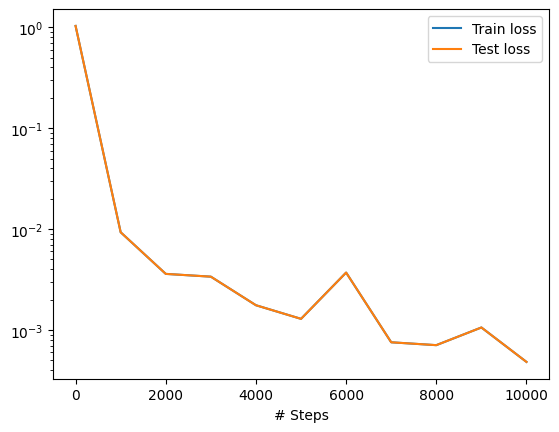

Compiling model...
'compile' took 0.000260 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
10000     [5.51e-05, 1.03e-04, 8.07e-05, 1.15e-04, 1.28e-04]    [5.51e-05, 1.03e-04, 8.07e-05, 1.15e-04, 1.28e-04]    []  
11000     [5.06e-05, 8.68e-05, 7.02e-05, 1.01e-04, 1.09e-04]    [5.06e-05, 8.68e-05, 7.02e-05, 1.01e-04, 1.09e-04]    []  
12000     [4.59e-05, 7.66e-05, 6.28e-05, 8.65e-05, 9.74e-05]    [4.59e-05, 7.66e-05, 6.28e-05, 8.65e-05, 9.74e-05]    []  
13000     [4.21e-05, 6.85e-05, 5.76e-05, 7.67e-05, 8.78e-05]    [4.21e-05, 6.85e-05, 5.76e-05, 7.67e-05, 8.78e-05]    []  
14000     [3.94e-05, 6.19e-05, 5.35e-05, 7.03e-05, 8.04e-05]    [3.94e-05, 6.19e-05, 5.35e-05, 7.03e-05, 8.04e-05]    []  
15000     [3.62e-05, 5.63e-05, 5.03e-05, 6.25e-05, 7.38e-05]    [3.62e-05, 5.63e-05, 5.03e-05, 6.25e-05, 7.38e-05]    []  
16000     [3.45e-05, 5.17e-05, 4.74e-05, 5.92e-05, 6.87e-05]    [3.

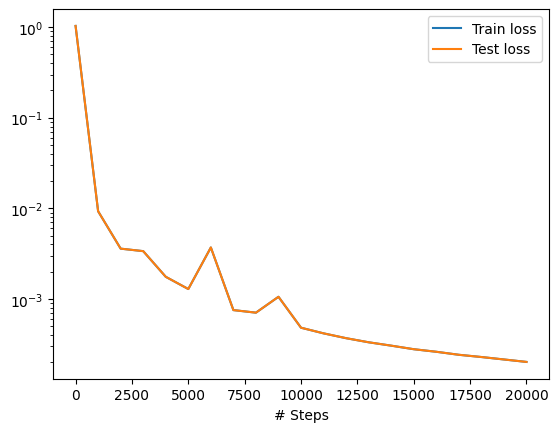

Mean residual: 0.0042290357


In [5]:
import os
os.environ["DDE_BACKEND"]="pytorch"
import deepxde as dde

# Determinism may reduce performance in DeepXDE (see doc) but needs to
# be set for a fair comparison with Jinns
# https://deepxde.readthedocs.io/en/stable/modules/deepxde.html#deepxde.config.set_random_seed
dde.config.set_random_seed(seed)

C1 = dde.Variable(C1_init)
C2 = dde.Variable(C2_init)

# Define Navier Stokes Equations (Time-dependent PDEs)
def Navier_Stokes_Equation(x, y):
    u = y[:, 0:1]
    v = y[:, 1:2]
    p = y[:, 2:3]
    du_x = dde.grad.jacobian(y, x, i=0, j=0)
    du_y = dde.grad.jacobian(y, x, i=0, j=1)
    du_t = dde.grad.jacobian(y, x, i=0, j=2)
    dv_x = dde.grad.jacobian(y, x, i=1, j=0)
    dv_y = dde.grad.jacobian(y, x, i=1, j=1)
    dv_t = dde.grad.jacobian(y, x, i=1, j=2)
    dp_x = dde.grad.jacobian(y, x, i=2, j=0)
    dp_y = dde.grad.jacobian(y, x, i=2, j=1)
    du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    dv_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    dv_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    continuity = du_x + dv_y
    x_momentum = du_t + C1 * (u * du_x + v * du_y) + dp_x - C2 * (du_xx + du_yy)
    y_momentum = dv_t + C1 * (u * dv_x + v * dv_y) + dp_y - C2 * (dv_xx + dv_yy)
    return [continuity, x_momentum, y_momentum]

# Define Spatio-temporal domain
# Rectangular
Lx_min, Lx_max = 1.0, 8.0
Ly_min, Ly_max = -2.0, 2.0
# Spatial domain: X × Y = [1, 8] × [−2, 2]
space_domain = dde.geometry.Rectangle([Lx_min, Ly_min], [Lx_max, Ly_max])
# Time domain: T = [0, 7]
time_domain = dde.geometry.TimeDomain(0, 7)
# Spatio-temporal domain
geomtime = dde.geometry.GeometryXTime(space_domain, time_domain)

# Get the training data: num = 7000
[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)
ob_xyt = np.hstack((ob_x, ob_y, ob_t))
observe_u = dde.icbc.PointSetBC(ob_xyt, ob_u, component=0)
observe_v = dde.icbc.PointSetBC(ob_xyt, ob_v, component=1)

# Training datasets and Loss
data = dde.data.TimePDE(
    geomtime,
    Navier_Stokes_Equation,
    [observe_u, observe_v],
    num_domain=DEFAULT_NUM_DOMAIN_POINTS,
    num_boundary=DEFAULT_NUM_BOUNDARY_POINTS,
    num_initial=DEFAULT_NUM_INITIAL_POINTS,
    anchors=ob_xyt,
)

# Neural Network setup
layer_size = [3] + [50] * 6 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)
model = dde.Model(data, net)

# callbacks for storing results
fnamevar = "variables.dat"
variable = dde.callbacks.VariableValue([C1, C2], period=100, filename=fnamevar)

# Compile, train and save model
model.compile("adam", lr=1e-3, external_trainable_variables=[C1, C2])
loss_history, train_state = model.train(
    iterations=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
)
dde.saveplot(loss_history, train_state, issave=True, isplot=True)
model.compile("adam", lr=1e-4, external_trainable_variables=[C1, C2])
loss_history, train_state = model.train(
    iterations=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
)
dde.saveplot(loss_history, train_state, issave=True, isplot=True)
# model.save(save_path = "./NS_inverse_model/model")
f = model.predict(ob_xyt, operator=Navier_Stokes_Equation)
print("Mean residual:", np.mean(np.absolute(f)))

## jinns

In [6]:
import jax
import equinox as eqx
import jinns
import jax.numpy as jnp
from jax import grad, vmap, random
import optax
import time
import matplotlib.pyplot as plt

key = random.PRNGKey(seed)

In [7]:
eqx_list = (
    (eqx.nn.Linear, 3, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 3)
)
key, subkey = random.split(key)
u_pinn, init_nn_params_pinn = jinns.utils.create_PINN(subkey, eqx_list, "nonstatio_PDE", 2)

In [8]:
n = DEFAULT_NUM_DOMAIN_POINTS
ni = DEFAULT_NUM_INITIAL_POINTS
nb = DEFAULT_NUM_BOUNDARY_POINTS
dim = 2
xmin = 1
xmax = 8
ymin= -2
ymax= 2
tmin = 0
tmax = 7
method = "grid" # equals "uniform" in deepXDE, while "uniform" in jinns equals "pseudo" in deepXDE

train_data = jinns.data.CubicMeshPDENonStatio(
    key=subkey,
    n=n,
    nb=nb,
    ni=ni,
    dim=dim,
    min_pts=(xmin,ymin),
    max_pts=(xmax,ymax),
    tmin=tmin,
    tmax=tmax,
    method=method,
)

/home/hugo/Documents/recherche/pinn/gitlab/jinns/data/_DataGenerators.py:434: UserWarning: Grid sampling is requested in dimension 2 with a non perfect square dataset size (self.n = 700). Modifying self.n to self.n = 676.
  warnings.warn(


In [9]:
# Init parameters for NN and equation
init_params_pinn = jinns.parameters.Params(
    nn_params=init_nn_params_pinn,
    eq_params={
        "C1":jnp.array(C1_init),
        "C2":jnp.array(C2_init)
    }
)

In [10]:
from jinns.loss import PDENonStatio

class NavierStokes2D(PDENonStatio):
    def equation(self, t_x, u_p, params):
        u_ = lambda t_x, params: u_p(t_x, params)[0:2]
        p_ = lambda t_x, params: u_p(t_x, params)[2]

        du_dt = jax.jacrev(u_)(t_x, params)[:, 0]
        ux = lambda t_x, params: u_(t_x, params)[0]
        uy = lambda t_x, params: u_(t_x, params)[1]
    
        dux_dx = lambda t_x: grad(ux)(t_x, params)[1]
        dux_dy = lambda t_x: grad(ux)(t_x, params)[2]
    
        duy_dx = lambda t_x: grad(uy)(t_x, params)[1]
        duy_dy = lambda t_x: grad(uy)(t_x, params)[2]

        dp_dx = lambda t_x: grad(p_)(t_x, params)[1]
        dp_dy = lambda t_x: grad(p_)(t_x, params)[2]

        return jnp.array(
            [
                du_dt[0]
                    + params.eq_params["C1"] * (ux(t_x, params) * dux_dx(t_x) + uy(t_x, params) * dux_dy(t_x)) + dp_dx(t_x)
                    - params.eq_params["C2"] * jinns.loss.laplacian_rev(t_x, lambda t_x, params: ux(t_x, params), params, eq_type="nonstatio_PDE"),
                du_dt[1] 
                    + params.eq_params["C1"] * (ux(t_x, params) * duy_dx(t_x) + uy(t_x, params) * duy_dy(t_x)) + dp_dy(t_x)
                    - params.eq_params["C2"] * jinns.loss.laplacian_rev(t_x, lambda t_x, params: uy(t_x, params), params, eq_type="nonstatio_PDE"),
                dux_dx(t_x) + duy_dy(t_x),
            ]
        )
ns_loss = NavierStokes2D()

In [11]:
loss_weights = jinns.loss.LossWeightsPDENonStatio(
    dyn_loss=1, initial_condition=0, boundary_loss=0, observations=1
)

In [12]:
key, subkey = jax.random.split(key)

[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)
ob_t_x = np.hstack((ob_t, ob_x, ob_y))

obs_data = jinns.data.DataGeneratorObservations(
    subkey,
    obs_batch_size=None,
    observed_pinn_in=ob_t_x,
    observed_values=np.hstack((ob_u, ob_v))
)

In [13]:
derivative_keys = jinns.parameters.DerivativeKeysPDENonStatio.from_str(
    dyn_loss=jinns.parameters.Params(
        nn_params = True,
        eq_params = {
            'C1':True,
            'C2':True
        }
    ),
    boundary_loss="nn_params",
    initial_condition="nn_params",
    observations="nn_params",
    params=init_params_pinn
)

In [14]:
loss_pinn = jinns.loss.LossPDENonStatio(
    u=u_pinn,
    loss_weights=loss_weights,
    dynamic_loss=ns_loss,
    derivative_keys=derivative_keys,
    omega_boundary_fun=None,
    omega_boundary_condition=None,
    initial_condition_fun=None,
    params=init_params_pinn,
    obs_slice=jnp.s_[0:2]
)

/home/hugo/Documents/recherche/pinn/gitlab/jinns/loss/_LossPDE.py:177: UserWarning: Missing boundary function or no boundary condition.Boundary function is thus ignored.
  warnings.warn(
/home/hugo/Documents/recherche/pinn/gitlab/jinns/loss/_LossPDE.py:592: UserWarning: Initial condition wasn't provided. Be sure to cover for thatcase (e.g by. hardcoding it into the PINN output).
  warnings.warn(


In [15]:
# Training loop in Jinns
params_pinn = init_params_pinn
tx = optax.adam(learning_rate=1e-3)
n_iter = 10000

In [16]:
params_pinn, total_loss_list_pinn, loss_by_term_dict_pinn, _, _, opt_state, stored_params, _, _ = jinns.solve(
    init_params=params_pinn,
    data=train_data,
    optimizer=tx,
    loss=loss_pinn,
    n_iter=n_iter,
    obs_data=obs_data,
    tracked_params = jinns.parameters.Params(
        eq_params={"C1":True, "C2":True}
    ),
    verbose=True
)


Compilation took
 8.267653703689575 

[train] Iteration 0: loss value = 1.2674092054367065
[train] Iteration 1000: loss value = 0.019456833600997925
[train] Iteration 2000: loss value = 0.013225727714598179
[train] Iteration 3000: loss value = 0.005251600872725248
[train] Iteration 4000: loss value = 0.00402416568249464
[train] Iteration 5000: loss value = 0.00300327455624938
[train] Iteration 6000: loss value = 0.00213222554884851
[train] Iteration 7000: loss value = 0.0015861582942306995
[train] Iteration 8000: loss value = 0.002469678409397602
[train] Iteration 9000: loss value = 0.0012029351200908422

Stopping main optimization loop, cause: max iteration is reached

Training took
 88.4168746471405 


Final iteration 10000: train loss value = 0.0008821308147162199


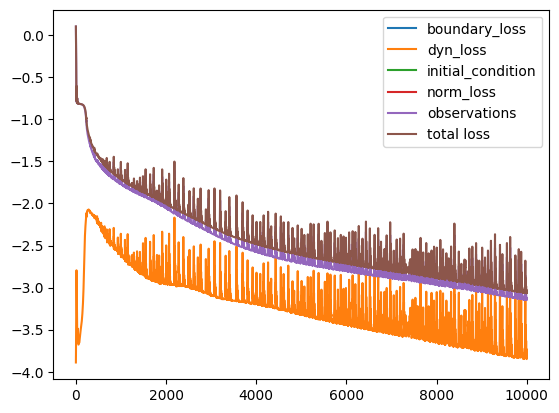

In [17]:
for loss_name, loss_values in loss_by_term_dict_pinn.items():
    plt.plot(jnp.log10(loss_values), label=loss_name)
plt.plot(jnp.log10(total_loss_list_pinn), label="total loss")
plt.legend()
plt.show()

In [18]:
tx = optax.adam(learning_rate=1e-4)
n_iter = 10000

In [19]:
params_pinn, total_loss_list_pinn, loss_by_term_dict_pinn, _, _, _, stored_params, _, _ = jinns.solve(
    init_params=params_pinn,
    data=train_data,
    optimizer=tx,
    loss=loss_pinn,
    n_iter=n_iter,
    obs_data=obs_data,
    opt_state=opt_state,
    tracked_params = jinns.parameters.Params(
        eq_params={"C1":True, "C2":True}
    ),
    verbose=True
)


Compilation took
 4.148965835571289 

[train] Iteration 0: loss value = 0.0008894632919691503
[train] Iteration 1000: loss value = 0.0008227272192016244
[train] Iteration 2000: loss value = 0.0007857730379328132
[train] Iteration 3000: loss value = 0.0007328458013944328
[train] Iteration 4000: loss value = 0.000660654332023114
[train] Iteration 5000: loss value = 0.0005760590429417789
[train] Iteration 6000: loss value = 0.0005066341254860163
[train] Iteration 7000: loss value = 0.0004719820281025022
[train] Iteration 8000: loss value = 0.0004120123921893537
[train] Iteration 9000: loss value = 0.0003713396145030856

Stopping main optimization loop, cause: max iteration is reached

Training took
 87.03750443458557 


Final iteration 10000: train loss value = 0.000340391939971596


## PINA

In [4]:
from pytorch_lightning import seed_everything

# setting the seed for reproducibility
seed_everything(seed, workers=True)

Seed set to 1


1

In [5]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
import torch
from pytorch_lightning.callbacks import Callback
from pina.problem import SpatialProblem, InverseProblem, TimeDependentProblem
from pina.operators import grad, div, laplacian
from pina.model import FeedForward
from pina.equation import Equation, FixedValue, SystemEquation
from pina import Condition, Trainer, LabelTensor
from pina.solvers import PINN
from pina.geometry import CartesianDomain

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
### Define ranges of variables
x_min = 1
x_max = 8
y_min = -2
y_max = 2
tmin = 0
tmax = 7

[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)
ob_t_x = LabelTensor(
    torch.from_numpy(np.hstack((ob_t, ob_x, ob_y))).float(), #.to(device).float(),
    labels=['t', 'x', 'y']
)
ob_u = LabelTensor(
    torch.from_numpy(ob_u).to(device).float(),
    labels=["ux"]
)
ob_v = LabelTensor(
    torch.from_numpy(ob_v).to(device).float(),
    labels=["uy"]
)

class Navier_Stokes_inverse(SpatialProblem, InverseProblem, TimeDependentProblem):

    output_variables = ['ux', 'uy', 'p']

    spatial_domain = CartesianDomain({'x': [x_min, x_max], 'y': [y_min, y_max]})
    temporal_domain = CartesianDomain({'t': [tmin, tmax]})
    unknown_parameter_domain = CartesianDomain({'C1': [-3, 3], 'C2': [-3, 3]})

            
    def NS_equation_x(input_, output_, params_):
        dux_dt = grad(output_, input_, components=['ux'], d=['t'])
        dux_dx = grad(output_, input_, components=['ux'], d=['x'])
        dux_dy = grad(output_, input_, components=['ux'], d=['y'])
        lap_ux = laplacian(output_, input_, components=['ux'], d=['x', 'y'])
        dp_dx = grad(output_, input_, components=['p'], d=['x'])

        return (dux_dt + params_["C1"] * (output_.extract(['ux']) * dux_dx + output_.extract(['uy']) * dux_dy) +
            dp_dx - params_["C2"] * lap_ux)

    def NS_equation_y(input_, output_, params_):
        duy_dt = grad(output_, input_, components=['uy'], d=['t'])
        duy_dx = grad(output_, input_, components=['uy'], d=['x'])
        duy_dy = grad(output_, input_, components=['uy'], d=['y'])
        lap_uy = laplacian(output_, input_, components=['uy'], d=['x', 'y'])
        dp_dy = grad(output_, input_, components=['p'], d=['y'])

        return (duy_dt + params_["C1"] * (output_.extract(['ux']) * duy_dx + output_.extract(['uy']) * duy_dy) +
            dp_dy - params_["C2"] * lap_uy)
        
    def conservation_equation(input_, output_, params_):
        return div(output_, input_, components=['ux', 'uy'], d=['x', 'y'])

    def data_equation_x(input_, output_, params_):
        return output_.extract(['ux']) - ob_u

    def data_equation_y(input_, output_, params_):
        return output_.extract(['uy']) - ob_v

    # define the conditions for the loss (boundary conditions, equation, data)
    conditions = {
        'D': Condition(location=CartesianDomain(
            {'x': [x_min, x_max], 'y': [y_min, y_max], 't': [tmin, tmax]
            }),
        equation=SystemEquation([NS_equation_x, NS_equation_y, conservation_equation])),
        'data': Condition(
            input_points=ob_t_x,
            equation=SystemEquation([data_equation_x, data_equation_y])
        ),
    }

problem = Navier_Stokes_inverse()

In [7]:
from math import sqrt

problem.discretise_domain(
    n=int(np.round(DEFAULT_NUM_DOMAIN_POINTS ** (1 / 3))), # NOTE
    mode='grid',
    variables=['t', 'x', 'y'],
    locations='D'
)
print('Input points:', problem.input_pts['D'].shape)
# plt.scatter(x=problem.input_pts['D'][:, 1], y=problem.input_pts['D'][:, 2])
# plt.show()

Input points: labels(['t', 'x', 'y'])
LabelTensor([[[ 0.0000,  1.0000, -2.0000]],
             [[ 0.8750,  1.0000, -2.0000]],
             [[ 1.7500,  1.0000, -2.0000]],
             ...,
             [[ 5.2500,  8.0000,  2.0000]],
             [[ 6.1250,  8.0000,  2.0000]],
             [[ 7.0000,  8.0000,  2.0000]]])


In [16]:
from pina import Trainer
from pina.solvers import PINN
from pina.callbacks import MetricTracker, PINAProgressBar
from pytorch_lightning.callbacks import Timer

# temporary directory for saving logs of training
tmp_dir = "tmp_pina"

class SaveParameters(Callback):
    '''
    Callback to save the parameters of the model every 1000 epochs.
    '''
    def on_train_epoch_end(self, trainer, __):
        if trainer.current_epoch % 1000 == 999:
            torch.save(trainer.solver.problem.unknown_parameters, '{}/parameters_epoch{}'.format(tmp_dir, trainer.current_epoch))


pbar = PINAProgressBar(metrics=['mean'], refresh_rate=1)

# build the model
model_ = FeedForward(
    layers=[50, 50, 50, 50, 50, 50],
    func=torch.nn.Tanh,
    output_dimensions=len(problem.output_variables),
    input_dimensions=len(problem.input_variables)
)

# create the PINN object
pinn = PINN(
    problem,
    model_,
    optimizer=torch.optim.Adam,
    optimizer_kwargs={'lr': 1e-3},
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_kwargs={'milestones':[10000], 'gamma':0.1} # reduce to lr=1e-4 after 10000 iterations
)

# create the trainer
trainer = Trainer(
    solver=pinn,
    max_epochs=20000,
    callbacks=[MetricTracker(), pbar, SaveParameters(), Timer()],
    accelerator='gpu',
    enable_model_summary=False,
    log_every_n_steps=1000,
    val_check_interval=1000,
    check_val_every_n_epoch=None,
    enable_checkpointing=False,
    default_root_dir=tmp_dir
) 

# train
trainer.train()

print(f'Total training time {trainer.callbacks[-1].time_elapsed("train"):.5f} s')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/hugo/anaconda3/envs/pinn_gpu/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=1000). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                               | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20000` reached.


Total training time 1403.23423 s


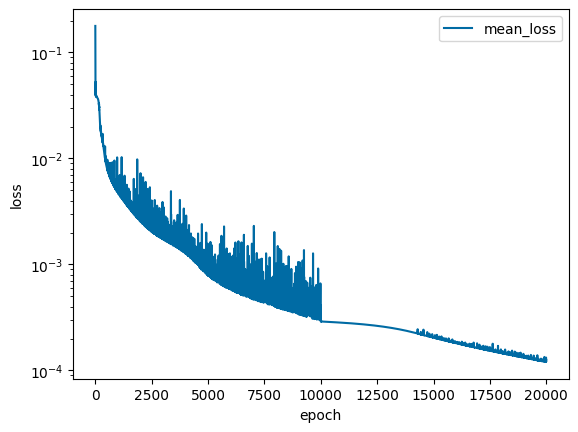

In [17]:
from pina import Plotter

pl = Plotter()
pl.plot_loss(trainer=trainer, label = 'mean_loss', logy=True)

/tmp/ipykernel_59220/3945336117.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params_torch = torch.load('{}/parameters_epoch{}'.format(tmp_dir, epoch))


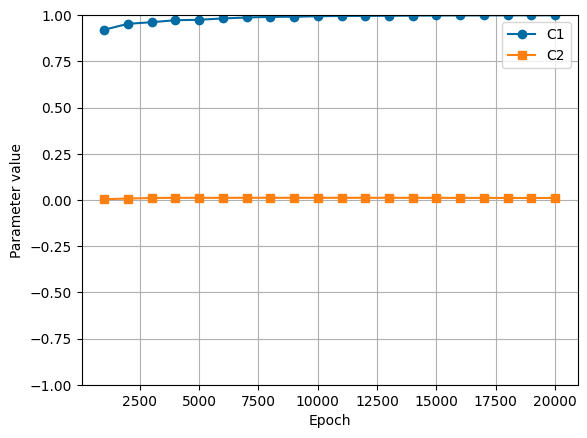

In [19]:
max_epochs = 20000
epochs_saved = range(999, max_epochs, 1000)
parameters = torch.empty((int(max_epochs/1000), 2))
for i, epoch in enumerate(epochs_saved):
    params_torch = torch.load('{}/parameters_epoch{}'.format(tmp_dir, epoch))
    for e, var in enumerate(pinn.problem.unknown_variables):
        parameters[i, e] = params_torch[var].data

# Plot parameters
plt.close()
plt.plot(epochs_saved, parameters[:, 0], label='C1', marker='o')
plt.plot(epochs_saved, parameters[:, 1], label='C2', marker='s')
plt.ylim(-1, 1)
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Parameter value')
plt.show()

## Comparisons

In [20]:
print(f"{C1_init=}, {C2_init=}")
C1_true = 1.0
C2_true = 0.01
print(f"According to DeepXDE's doc, true C1 is {C1_true=} and true {C2_true=}")

C1_init=0.0, C2_init=0.0
According to DeepXDE's doc, true C1 is C1_true=1.0 and true C2_true=0.01


In [28]:
import re
with open('variables.dat') as f:
    for line in f:
        pass
    last_line = line
C1_C2 = np.fromstring(
    min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), last_line), key=len),
    sep=",",
)
print("DeepXDE: estimated C1=", C1_C2[0],
      "l1re=", jnp.abs(C1_C2[0] - C1_true) / jnp.abs(C1_true),
      "l2re=", jnp.sqrt((C1_C2[0] - C1_true) **2) / jnp.sqrt(C1_true ** 2)
)
print("DeepXDE: estimated C2=", C1_C2[1],
      "l1re=", jnp.abs(C1_C2[1] - C2_true) / jnp.abs(C2_true),
      "l2re=", jnp.sqrt((C1_C2[1] - C2_true) **2) / jnp.sqrt(C2_true ** 2)
)

DeepXDE (iteration, estimated C1, estimated C2):
DeepXDE: estimated C1= 1.0 l1re= 0.0 l2re= 0.0
DeepXDE: estimated C2= 0.011 l1re= 0.1 l2re= 0.099999994


In [29]:
print("jinns: estimated C1=", stored_params.eq_params["C1"][-1],
      "l1re=", jnp.abs(stored_params.eq_params["C1"][-1] - C1_true) / jnp.abs(C1_true),
      "l2re=", jnp.sqrt((stored_params.eq_params["C1"][-1] - C1_true) **2) / jnp.sqrt(C1_true **2)
)
print("jinns: estimated C2=", stored_params.eq_params["C2"][-1],
      "l1re=", jnp.abs(stored_params.eq_params["C2"][-1] - C2_true) / jnp.abs(C2_true),
      "l2re=", jnp.sqrt((stored_params.eq_params["C2"][-1] - C2_true) **2) / jnp.sqrt(C2_true)
)

jinns: estimated C1= 0.99318147 l1re= 0.006818533 l2re= 0.006818533
jinns: estimated C2= 0.009850564 l1re= 0.014943536 l2re= 0.0014943536


In [21]:
C1_pina = parameters[-1, 0]
C2_pina = parameters[-1, 1]
print("PINA: estimated C1=", C1_pina,
      "l1re=", np.abs(C1_pina - C1_true) / np.abs(C1_true),
      "l2re=", np.sqrt((C1_pina - C1_true) **2) / np.sqrt(C1_true ** 2)
)
print("PINA: estimated C2=", C2_pina,
      "l1re=", np.abs(C2_pina - C2_true) / np.abs(C2_true),
      "l2re=", np.sqrt((C2_pina - C2_true) **2) / np.sqrt(C2_true ** 2)
)

PINA: estimated C1= tensor(0.9992) l1re= tensor(0.0008) l2re= tensor(0.0008)
PINA: estimated C2= tensor(0.0105) l1re= tensor(0.0542) l2re= tensor(0.0542)
